In [76]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the combined data
df = pd.read_csv("multi_season_team_summary.csv")

# Split data into training (known winners) and prediction (current season)
train_df = df[df["cup_winner"].notnull()].copy()
predict_df = df[df["season"] == "2024-2025"].copy()

# Define features and target
features = ["wins", "goal_diff", "win_pct", "elo", "playoff_games"]
X_train = train_df[features]
y_train = train_df["cup_winner"]

X_predict = predict_df[features]

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for current season
predict_df["prob_cup_win"] = model.predict_proba(X_predict)[:, 1]
predict_df["predicted"] = model.predict(X_predict)

# Sort by most likely to win
predict_df = predict_df.sort_values(by="prob_cup_win", ascending=False)

# Save predictions
predict_df.to_csv("2024_2025_predictions.csv", index=False)

# Show top results
print("🏆 2024–2025 Cup Predictions:")
print(predict_df[["team", "season", "wins", "goal_diff", "elo", "playoff_games", "prob_cup_win"]])


🏆 2024–2025 Cup Predictions:
    team     season  wins  goal_diff   elo  playoff_games  prob_cup_win
140  WPG  2024-2025    58         84  1621              3  2.350967e-04
155  TBL  2024-2025    47         69  1521              2  1.489284e-04
157  WSH  2024-2025    53         56  1545              3  3.781342e-05
143  VGK  2024-2025    51         52  1547              3  2.782390e-05
150  DAL  2024-2025    52         51  1550              3  2.311869e-05
144  COL  2024-2025    50         45  1559              3  1.304000e-05
145  LAK  2024-2025    50         46  1583              3  1.154854e-05
154  CAR  2024-2025    49         37  1520              3  8.858393e-06
136  TOR  2024-2025    55         43  1632              3  4.083080e-06
131  FLA  2024-2025    49         35  1550              2  3.329340e-06
128  NJD  2024-2025    43         16  1470              3  2.396782e-06
130  STL  2024-2025    45         23  1562              3  1.845965e-06
139  EDM  2024-2025    49         2

In [36]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the combined team summary dataset
df = pd.read_csv("multi_season_team_summary.csv")

# Split training (known cup winners) and prediction (current season)
train_df = df[df["cup_winner"].notnull()].copy()
predict_df = df[df["season"] == "2024-2025"].copy()

# Features we'll use
features = ["wins", "goal_diff", "win_pct", "elo", "playoff_games"]

# Training data
X_train = train_df[features]
y_train = train_df["cup_winner"]

# Prediction data
X_predict = predict_df[features]

# Tune the model: stronger regularization + balanced classes
model = LogisticRegression(
    C=100,                # Looser regularization
    class_weight="balanced",  # Helps with imbalanced classes
    solver='liblinear',   # Good for small datasets
    max_iter=1000         # Ensures convergence
)

# Train the model
model.fit(X_train, y_train)

# Predict probabilities and classes for 2024–25
predict_df["prob_cup_win"] = model.predict_proba(X_predict)[:, 1]
predict_df["predicted"] = model.predict(X_predict)

# Save predictions to file
predict_df.to_csv("2024_2025_predictions.csv", index=False)

# Show sorted prediction output
print("🏆 2024–25 Stanley Cup Predictions:")
print(predict_df.sort_values(by="prob_cup_win", ascending=False)[["team", "wins", "elo", "playoff_games", "prob_cup_win", "predicted"]])

# Optional: Evaluate model on the training set (just for your info)
print("\n📊 Model Accuracy on Past Seasons:")
y_pred_train = model.predict(X_train)
print(classification_report(y_train, y_pred_train))


🏆 2024–25 Stanley Cup Predictions:
    team  wins   elo  playoff_games  prob_cup_win  predicted
140  WPG    58  1621              3  6.373271e-08        0.0
155  TBL    47  1521              2  1.105065e-08        0.0
157  WSH    53  1545              3  1.651591e-09        0.0
143  VGK    51  1547              3  8.167638e-10        0.0
150  DAL    52  1550              3  6.191054e-10        0.0
144  COL    50  1559              3  1.862367e-10        0.0
145  LAK    50  1583              3  1.458526e-10        0.0
154  CAR    49  1520              3  8.798135e-11        0.0
136  TOR    55  1632              3  2.877051e-11        0.0
131  FLA    49  1550              2  1.100861e-11        0.0
128  NJD    43  1470              3  5.453476e-12        0.0
130  STL    45  1562              3  3.570652e-12        0.0
139  EDM    49  1552              3  2.535677e-12        0.0
146  OTT    45  1523              3  1.747517e-13        0.0
151  MIN    47  1525              3  2.439589e-14 

In [46]:
import statsmodels.api as sm

# Add a constant column for statsmodels
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels for pseudo R²
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Show summary
print(logit_model.summary())

In [78]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [80]:
# View the feature coefficients
for feature, coef in zip(X_train.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


wins: -0.0571
goal_diff: 0.1005
win_pct: 0.0068
elo: -0.0092
playoff_games: 0.4999


In [82]:
# Prepare your test data (X_test from 2024–2025)
X_test = predict_df[["wins", "goal_diff", "win_pct", "elo", "playoff_games"]]

# Get probabilities
y_test_prob = model.predict_proba(X_test)[:, 1]

# Attach predictions back to your predict_df
predict_df["prob_cup_win_sklearn"] = y_test_prob
predict_df["predicted_sklearn"] = model.predict(X_test)


In [84]:
# Sort by highest probability
top_preds = predict_df.sort_values(by="prob_cup_win_sklearn", ascending=False)

# Display top teams
print(top_preds[["team", "wins", "goal_diff", "win_pct", "elo", "playoff_games", "prob_cup_win_sklearn", "predicted_sklearn"]].head(10))


    team  wins  goal_diff   win_pct   elo  playoff_games  \
140  WPG    58         84  0.682353  1621              3   
155  TBL    47         69  0.559524  1521              2   
157  WSH    53         56  0.623529  1545              3   
143  VGK    51         52  0.600000  1547              3   
150  DAL    52         51  0.611765  1550              3   
144  COL    50         45  0.588235  1559              3   
145  LAK    50         46  0.588235  1583              3   
154  CAR    49         37  0.576471  1520              3   
136  TOR    55         43  0.647059  1632              3   
131  FLA    49         35  0.583333  1550              2   

     prob_cup_win_sklearn  predicted_sklearn  
140              0.000236                0.0  
155              0.000149                0.0  
157              0.000038                0.0  
143              0.000028                0.0  
150              0.000023                0.0  
144              0.000013                0.0  
145       

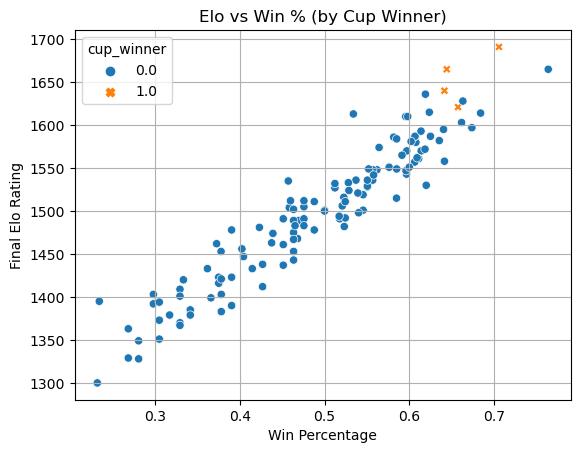

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=train_df, x="win_pct", y="elo", hue="cup_winner", style="cup_winner")
plt.title("Elo vs Win % (by Cup Winner)")
plt.xlabel("Win Percentage")
plt.ylabel("Final Elo Rating")
plt.grid(True)
plt.show()


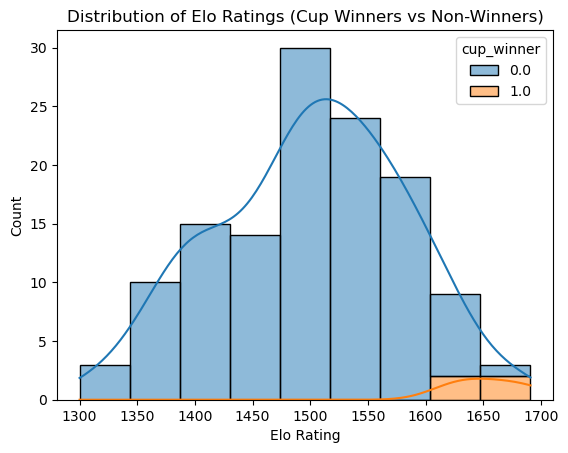

In [88]:
sns.histplot(data=train_df, x="elo", hue="cup_winner", kde=True, multiple="stack")
plt.title("Distribution of Elo Ratings (Cup Winners vs Non-Winners)")
plt.xlabel("Elo Rating")
plt.show()


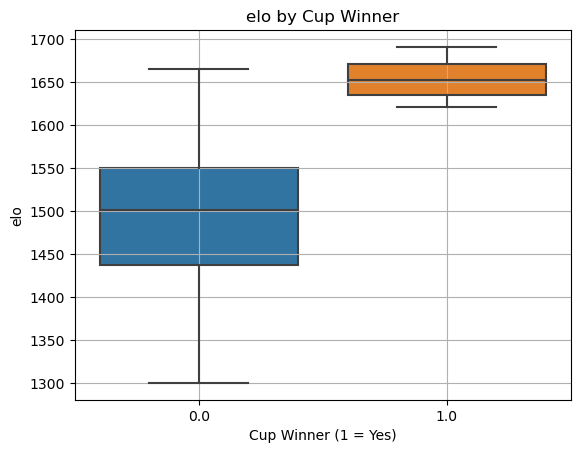

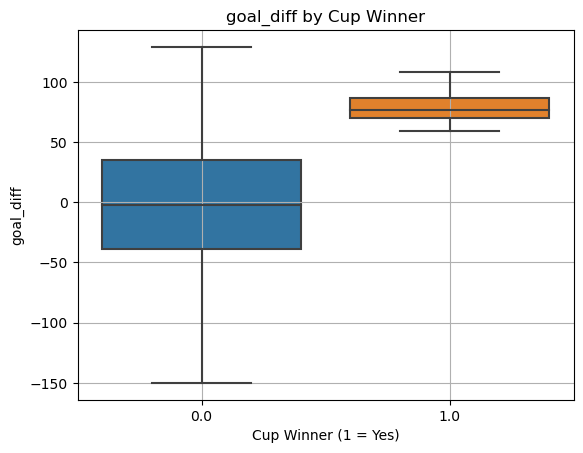

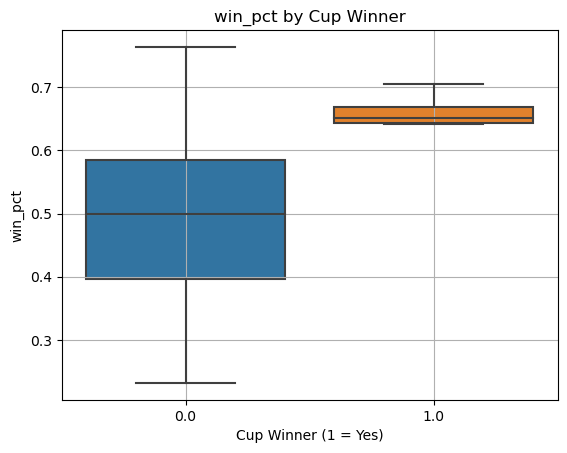

In [90]:
features = ["elo", "goal_diff", "win_pct"]
for f in features:
    sns.boxplot(data=train_df, x="cup_winner", y=f)
    plt.title(f"{f} by Cup Winner")
    plt.xlabel("Cup Winner (1 = Yes)")
    plt.ylabel(f)
    plt.grid(True)
    plt.show()


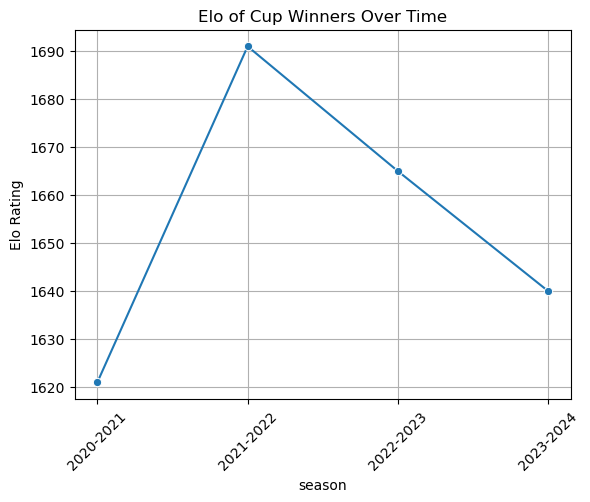

In [92]:
cup_stats = train_df[train_df["cup_winner"] == 1]
sns.lineplot(data=cup_stats, x="season", y="elo", marker="o")
plt.title("Elo of Cup Winners Over Time")
plt.ylabel("Elo Rating")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


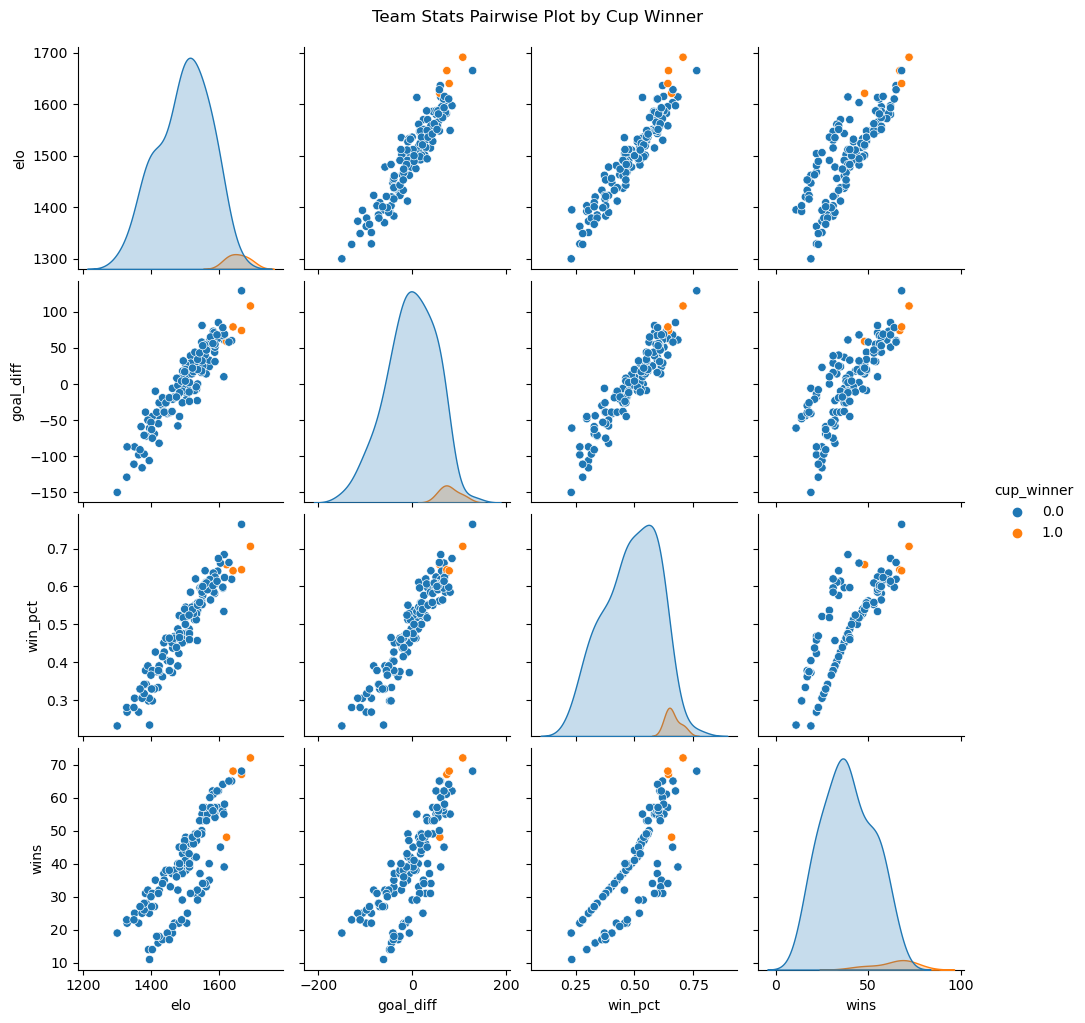

In [94]:
sns.pairplot(train_df, hue="cup_winner", vars=["elo", "goal_diff", "win_pct", "wins"])
plt.suptitle("Team Stats Pairwise Plot by Cup Winner", y=1.02)
plt.show()


In [98]:
df.head()

,team,season,games_played,playoff_games,wins,losses,goals_for,goals_against,goal_diff,win_pct,elo,cup_winner
0,BUF,2020-2021,47,0,11,36,111,172,-61,0.234043,1395,0.0
1,NJD,2020-2021,48,0,16,32,127,171,-44,0.333333,1420,0.0
2,CAR,2020-2021,62,11,37,25,196,159,37,0.596774,1543,0.0
3,DAL,2020-2021,51,0,19,32,138,144,-6,0.372549,1462,0.0
4,DET,2020-2021,47,0,17,30,109,139,-30,0.361702,1433,0.0


In [102]:
predict_df.head()

,team,season,games_played,playoff_games,wins,losses,goals_for,goals_against,goal_diff,win_pct,elo,cup_winner,prob_cup_win,predicted,prob_cup_win_sklearn,predicted_sklearn
140,WPG,2024-2025,85,3,58,27,286,202,84,0.682353,1621,NaN,0.000235,0.0,0.000236,0.0
155,TBL,2024-2025,84,2,47,37,296,227,69,0.559524,1521,NaN,0.000149,0.0,0.000149,0.0
157,WSH,2024-2025,85,3,53,32,297,241,56,0.623529,1545,NaN,0.000038,0.0,0.000038,0.0
143,VGK,2024-2025,85,3,51,34,283,231,52,0.600000,1547,NaN,0.000028,0.0,0.000028,0.0
150,DAL,2024-2025,85,3,52,33,284,233,51,0.611765,1550,NaN,0.000023,0.0,0.000023,0.0


In [106]:
underrated = predict_df[
    (df["elo"] > 1550) & 
    (predict_df["predicted"] == 0) & 
    (df["season"] == "2024-2025")
]
print(underrated[["team", "elo", "prob_cup_win", "wins", "goal_diff"]])


    team   elo  prob_cup_win  wins  goal_diff
140  WPG  1621      0.000235    58         84
144  COL  1559      0.000013    50         45
145  LAK  1583      0.000012    50         46
136  TOR  1632      0.000004    55         43
130  STL  1562      0.000002    45         23
139  EDM  1552      0.000001    49         21


/var/folders/tb/9ztd83zd25xb9w5xfq415x100000gn/T/ipykernel_95460/1018047403.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  underrated = predict_df[


In [108]:
df = pd.read_csv("multi_season_summary_with_predictions.csv")
comparison_df = df[df["cup_winner"].notnull()].copy()

# Create a match/miss indicator
comparison_df["match"] = comparison_df.apply(
    lambda row: "Correct" if row["predicted"] == 1 and row["cup_winner"] == 1
    else "False Positive" if row["predicted"] == 1
    else "Missed Winner" if row["cup_winner"] == 1
    else "Not Predicted",
    axis=1
)

print(comparison_df["match"].value_counts())


Not Predicted    123
Missed Winner      4
Name: match, dtype: int64
